# Diabetes Prediction with Pima data

In [15]:
#imports for the process
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
#this makes it possible to view the plots inline with the code
%matplotlib inline 
from sklearn import metrics
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

## Loading and Reviewing data

In [16]:
df = pd.read_csv('c:\data\diabetes.csv')

In [17]:
df.shape


(768, 9)

In [18]:
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
df.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [20]:
glucose = df['Glucose']
glucose3 = glucose[4:5]
glucose3

4    137
Name: Glucose, dtype: int64

### Checking for Null values

In [21]:
df.isnull().values.any()
# the isnull() checks to see if there are any null values
# the any() method returns true if the is a null value in the whole data


False

## checking for data correlation
This helps remove redundant data or data thas repeats on different columns

In [22]:
df.corr()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [23]:
def plot_corr(df, size=11):
    '''
        this is a function to produce a graph that shows the correlation betweeen
        the columns and use color representations to show which colums
        are more correlated thana others
    '''
    corr = df.corr()
    fig,ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

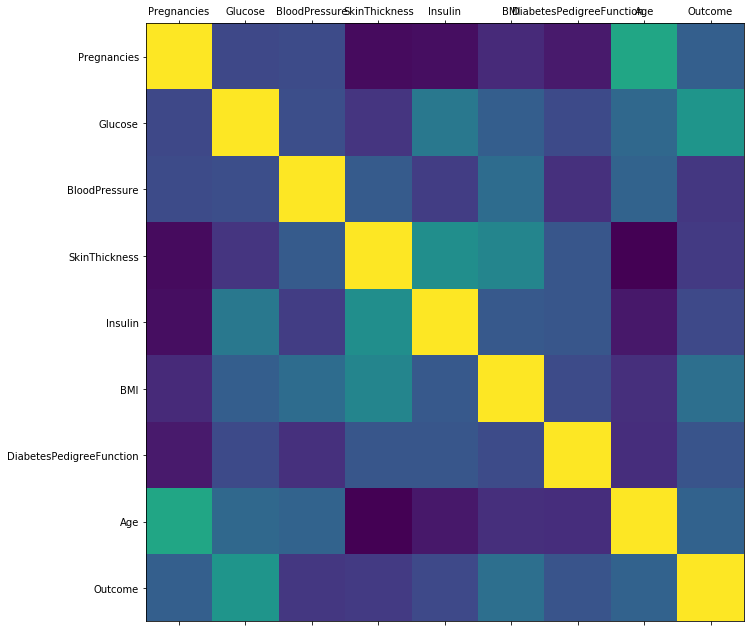

In [24]:
plot_corr(df)


In [25]:
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


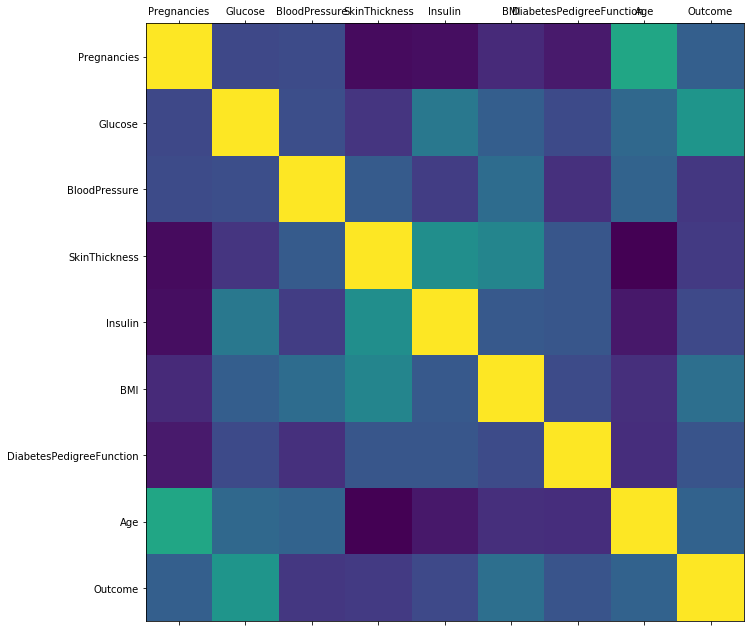

In [26]:
plot_corr(df)

changing true to 1 and false to 0

In [27]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
diabetes_map = {True : 1, False : 0}

In [29]:
df['Outcome'] = df['Outcome'].map(diabetes_map)

In [30]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


####  cheking what percentage has/doesnt have diabetes

In [31]:
num_trues = len(df.loc[df['Outcome'] == True])
num_falses = len(df.loc[df['Outcome'] == False])
trues_percentage = (num_trues/(num_falses + num_trues))*100
falses_percentage = (num_falses/(num_falses + num_trues))*100
print ('Trues : {}'.format(trues_percentage))
print ('Falses : {}'.format(falses_percentage))

Trues : 34.89583333333333
Falses : 65.10416666666666


## Splitting the data
70% for training, 30% for testing

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split

feature_col_names = ['Pregnancies','Glucose','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
predicted_class_names = ['Outcome']
x = df[feature_col_names].values
y = df[predicted_class_names].values
split_test_size = 0.30

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = split_test_size, random_state=42)

checking for 70,30 split in the data

In [36]:
print ("{:0.2f}".format((len(x_train)/len(x))*100))
print ("{:0.2f}".format((len(x_test)/len(x))*100))

69.92
30.08


### Cheking for number of true and false in the training and test data

In [37]:
print ("Training_Trues: {:0.2f}".format((len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print ("Training_Falses: {:0.2f}".format((len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print ("")
print ("Test_Trues: {:0.2f}".format((len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print ("Test_Falses: {:0.2f}".format((len(y_test[y_test[:] == 0])/len(y_test)) * 100))


Training_Trues: 35.01
Training_Falses: 64.99

Test_Trues: 34.63
Test_Falses: 65.37


### Check for missing data in each column, analyze and edit the data
### Impute with the mean

In [38]:
from sklearn.preprocessing import Imputer

#impute with mean for all missing values 0 
fill_0 = Imputer(missing_values=0, strategy="mean", axis=0)

x_train = fill_0.fit_transform(x_train)
x_test = fill_0.fit_transform(x_test)

## Training Initial Algorithm

In [39]:
from sklearn.naive_bayes import GaussianNB

#create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(x_train, y_train.ravel())

GaussianNB(priors=None)

### Performance on Testing Data

In [40]:
#import the perfomance metrics library
from sklearn import metrics

#how the trained model performs on the testing data
nb_predict_test = nb_model.predict(x_test)
acc = metrics.accuracy_score(y_test, nb_predict_test)
print ('Accuracy : {}'.format(acc*100))


Accuracy : 74.89177489177489


###   Metrics

In [41]:
print ("Comparing Matrics")
print ("{}".format(metrics.confusion_matrix(y_test, nb_predict_test, labels=[1, 0])))
print ("")
print ("Classification Report")
print (metrics.classification_report(y_test, nb_predict_test, labels=[1,0]))

Comparing Matrics
[[ 52  28]
 [ 30 121]]

Classification Report
             precision    recall  f1-score   support

          1       0.63      0.65      0.64        80
          0       0.81      0.80      0.81       151

avg / total       0.75      0.75      0.75       231



## Random Forest

In [42]:
from sklearn.ensemble import  RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(x_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

### Predicting the train data

In [43]:
rf_train_predict = rf_model.predict(x_train)
acc = metrics.accuracy_score(y_train, rf_train_predict)
print (acc*100)

98.69646182495345


### Predicting the test data

In [44]:
rf_test_predict = rf_model.predict(x_test)
acc = metrics.accuracy_score(y_test, rf_test_predict)
print (acc*100)

70.995670995671


#### Metrics

In [45]:
print ("confusion Matrix")
print(metrics.confusion_matrix(y_test, rf_test_predict, labels = [1, 0]))
print ("")
print("Classification Report")
print (metrics.classification_report(y_test, rf_test_predict, labels=[1, 0]))

confusion Matrix
[[ 41  39]
 [ 28 123]]

Classification Report
             precision    recall  f1-score   support

          1       0.59      0.51      0.55        80
          0       0.76      0.81      0.79       151

avg / total       0.70      0.71      0.70       231



## Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.7, random_state=42)
lr_model.fit(x_train, y_train.ravel())
lr_predict_test = lr_model.predict(x_test)

acc = metrics.accuracy_score(y_test, lr_predict_test)
print ("Accuracy :{}" .format (acc*100))

print ("")

#training metrics
print ("confusion Matrix")
print(metrics.confusion_matrix(y_test, lr_predict_test, labels = [1, 0]))
print ("")
print("Classification Report")
print (metrics.classification_report(y_test, lr_predict_test, labels=[1, 0]))

Accuracy :75.75757575757575

confusion Matrix
[[ 49  31]
 [ 25 126]]

Classification Report
             precision    recall  f1-score   support

          1       0.66      0.61      0.64        80
          0       0.80      0.83      0.82       151

avg / total       0.75      0.76      0.76       231



## LogisticRegressionCV

In [47]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, Cs=3, random_state = 42, cv=10, refit=False, class_weight="balanced")
lr_cv_model.fit(x_train, y_train.ravel())


LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
           refit=False, scoring=None, solver='lbfgs', tol=0.0001,
           verbose=0)

### Predict on test data


In [48]:
lr_cv_predict_test = lr_cv_model.predict(x_test)

#training metrics
print("Accuracy: {}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, lr_cv_predict_test, labels=[1,0]))
print ("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test, labels=[1,0]))

Accuracy: 0.7012987012987013
Confusion Matrix
[[ 53  27]
 [ 42 109]]

Classification Report
             precision    recall  f1-score   support

          1       0.56      0.66      0.61        80
          0       0.80      0.72      0.76       151

avg / total       0.72      0.70      0.71       231



# THE END